# MNIST Prediction with Artificial Neural Network

- MNIST dataset: is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. More info can be found at the [MNIST homepage](http://yann.lecun.com/exdb/mnist/).
- Goal: build a simple artificial neural network to predict the digit in the images.

In [184]:
import keras
import numpy as np
import matplotlib.pyplot as plt

from keras import layers
from typing import Optional
from utils import get_activation_function, max_pooling

## 1. Utility Functions

In [208]:
def plot_data(
    X: np.ndarray, y: np.ndarray, y_proba: Optional[np.ndarray] = None
) -> None:
    nrows, ncols = 2, 4
    _, axes = plt.subplots(nrows, ncols, figsize=(8, 4))

    len_x = X.shape[0]
    for idx in range(nrows * ncols):
        ax = axes[idx // ncols, idx % ncols]

        img_idx = np.random.randint(0, len_x)

        ax.imshow(X[img_idx], cmap="gray")
        ax.set(xticks=[], yticks=[])

        true_label = f"True: {y[img_idx]}"

        if y_proba is not None:
            pred_label = f"Pred: {y_proba[img_idx]}"

        img_title = true_label if y_proba is None else f"{true_label}\n{pred_label}"
        ax.set_xlabel(img_title)

    plt.tight_layout()
    plt.show()

## 2. Load Data

In [186]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

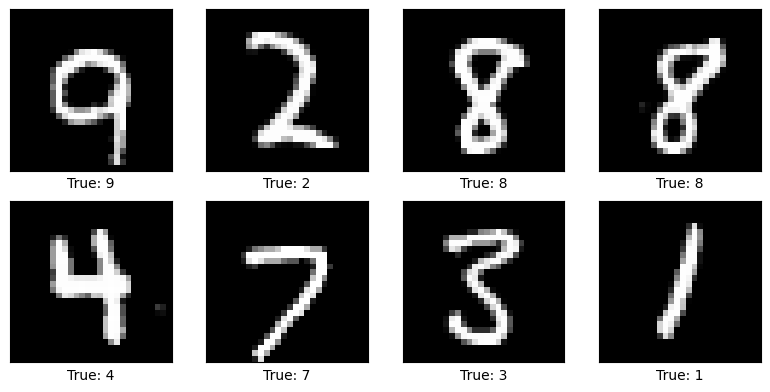

In [187]:
plot_data(X_train, y_train)

## 3. Image Preprocessing

In [188]:
# Convert to float32 and scale to [0, 1]
X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0

In [189]:
# Add channel dimension
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [190]:
print("x_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [191]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## 4. Artificial Neural Network

### 4.1. With Convolutional Neural Network

#### 4.1.1. Model: Multi-Layer Perceptron

### 4.2 With Keras

In [192]:
inp_shape = X_train.shape[1:]

In [193]:
model = keras.models.Sequential(
    [
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(512, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_23 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [194]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")

In [195]:
batch_size = 128
epochs = 15

history = model.fit(
    X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1
)

Epoch 1/15
417/422 [============================>.] - ETA: 0s - loss: 0.4393 - accuracy: 0.8739

422/422 [==============================] - 1s 2ms/step - loss: 0.4365 - accuracy: 0.8747 - val_loss: 0.0959 - val_accuracy: 0.9717
Epoch 2/15
422/422 [==============================] - 1s 2ms/step - loss: 0.0898 - accuracy: 0.9727 - val_loss: 0.0731 - val_accuracy: 0.9778
Epoch 3/15
422/422 [==============================] - 1s 2ms/step - loss: 0.0535 - accuracy: 0.9834 - val_loss: 0.0701 - val_accuracy: 0.9775
Epoch 4/15
422/422 [==============================] - 1s 2ms/step - loss: 0.0361 - accuracy: 0.9891 - val_loss: 0.0636 - val_accuracy: 0.9813
Epoch 5/15
422/422 [==============================] - 1s 2ms/step - loss: 0.0291 - accuracy: 0.9904 - val_loss: 0.0614 - val_accuracy: 0.9827
Epoch 6/15
422/422 [==============================] - 1s 2ms/step - loss: 0.0173 - accuracy: 0.9945 - val_loss: 0.0768 - val_accuracy: 0.9805
Epoch 7/15
422/422 [==============================] - 1s 2ms/step - loss: 0.0144 - accuracy: 0.9951 - val_loss: 0.0826 - val_accuracy: 0.9783
Epoch 8/15
422/42

#### 4.2.1. Model results

In [196]:
history_dict = history.history

In [197]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [198]:
train_loss, val_loss = history_dict["loss"], history_dict["val_loss"]
train_acc, val_acc = history_dict["accuracy"], history_dict["val_accuracy"]

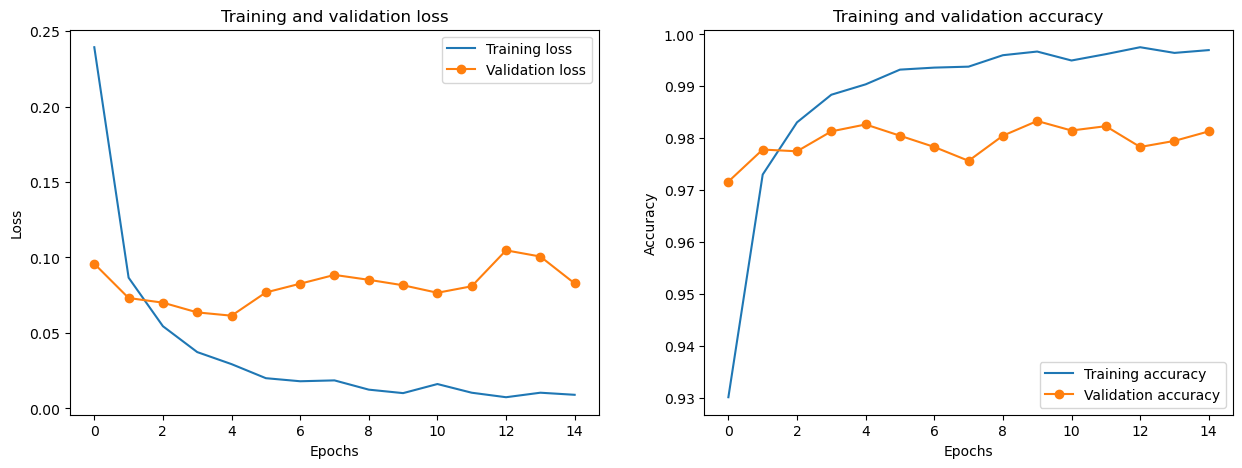

In [199]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
epochs_run = [i for i in range(epochs)]

ax1.plot(epochs_run, train_loss, label="Training loss")
ax1.plot(epochs_run, val_loss, label="Validation loss", marker="o")

ax1.set_title("Training and validation loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(epochs_run, train_acc, label="Training accuracy")
ax2.plot(epochs_run, val_acc, label="Validation accuracy", marker="o")

ax2.set_title("Training and validation accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend()

plt.show()

#### 4.2.1. Model prediction

In [200]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.08861740678548813
Test accuracy: 0.9800000190734863


In [201]:
y_pred = model.predict(X_test)

In [202]:
np.argmax(y_pred, axis=1)

array([7, 2, 1, ..., 4, 5, 6])

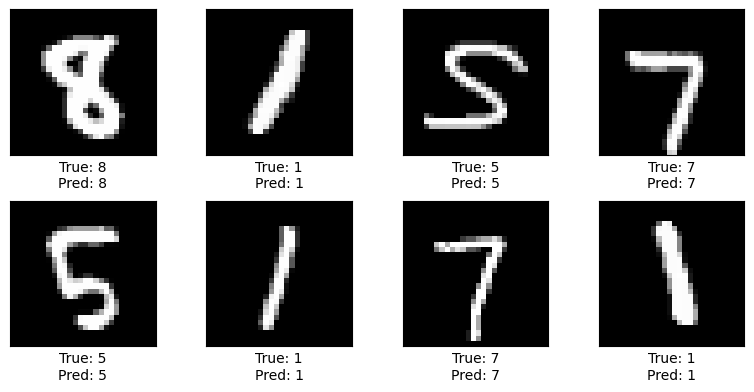

In [212]:
plot_data(X_test, np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))